# Regresión Lineal PIB Ecuador
Realizado por: Tatiana Cárdenas Jho

In [15]:
#Problema:
#Analizar con el gasto y el COVID-19 dentro del Ecuador y realizar un análisis con respecto a la actualidad
#y cambio de gobierno del país.

#Importación de librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn.linear_model import LinearRegression  
print('Importadas')

Importadas


In [16]:
data = pd.read_csv('PIB.csv',encoding='utf-8')
data = data.fillna(0)
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61.042300,67.813322,65.241349,76.509512,77.555556,73.517030,71.294029,73.332115,0.000000,0.000000
1,Afganistán,AFG,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,4.132233,4.453443,4.878051,9.171601,8.888893,11.258279,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Angola,AGO,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61.543113,60.669948,55.940131,50.747084,44.695031,29.754599,28.124485,29.004100,40.836290,40.556871
3,Albania,ALB,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.979449,29.241501,28.937487,28.916354,28.212979,27.267393,28.977864,31.569821,31.591574,31.555552
4,Andorra,AND,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
data.describe().round(3)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,264.000,264.000,264.000,264.000,264.000,264.000,264.000,264.000,264.000,264.000,...,264.000,264.000,264.000,264.000,264.000,264.000,264.000,264.000,264.000,264.000
mean,6.203,6.609,6.460,6.751,6.859,7.460,7.752,7.804,8.319,8.514,...,36.052,38.852,37.805,37.561,37.435,35.462,34.301,35.492,35.547,30.421
std,14.054,14.072,13.760,14.199,13.585,14.232,14.569,14.407,15.727,16.138,...,32.395,35.120,30.499,31.353,31.109,31.440,30.358,31.276,31.211,29.816
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,19.826,21.632,21.927,20.346,20.751,18.819,18.086,18.283,18.555,7.873
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,30.192,31.826,31.581,30.352,31.271,29.431,28.429,29.575,30.302,26.198
75%,9.298,9.703,9.281,9.264,10.065,10.985,11.283,11.250,11.780,12.649,...,46.758,50.837,50.417,48.122,47.305,45.294,44.546,45.938,47.114,40.717
max,162.826,142.423,138.121,141.153,122.085,123.237,123.278,114.293,125.660,132.126,...,298.341,339.019,215.850,221.610,213.090,221.197,213.036,217.621,211.559,208.753


In [18]:
data.keys()

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [19]:
#Analizamos el tipo de dato que tiene el dataset en caso de que tengamos que convertir algún valor
data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
Length: 64, dtype: object

In [20]:
#Como no se puede observar de manera adecuada los datos, vamos a pasar las filas como columas 
df = data.T
df.columns = data['Country Name']
df = df[4:]
df.head()

Country Name,Aruba,Afganistán,Angola,Albania,Andorra,El mundo árabe,Emiratos Árabes Unidos,Argentina,Armenia,Samoa Americana,...,Islas Vírgenes (EE.UU.),Viet Nam,Vanuatu,Mundo,Samoa,Kosovo,"Yemen, Rep. del",Sudáfrica,Zambia,Zimbabwe
1960,0,4.13223,0,0,0,0,0,7.60405,0,0,...,0,0,0,0,0,0,0,29.5509,0,0
1961,0,4.45344,0,0,0,0,0,5.99495,0,0,...,0,0,0,0,0,0,0,29.324,0,0
1962,0,4.87805,0,0,0,0,0,4.69184,0,0,...,0,0,0,0,0,0,0,29.4069,0,0
1963,0,9.1716,0,0,0,0,0,7.89045,0,0,...,0,0,0,0,0,0,0,28.6139,0,0
1964,0,8.88889,0,0,0,0,0,5.56372,0,0,...,0,0,0,0,0,0,0,27.4359,0,0


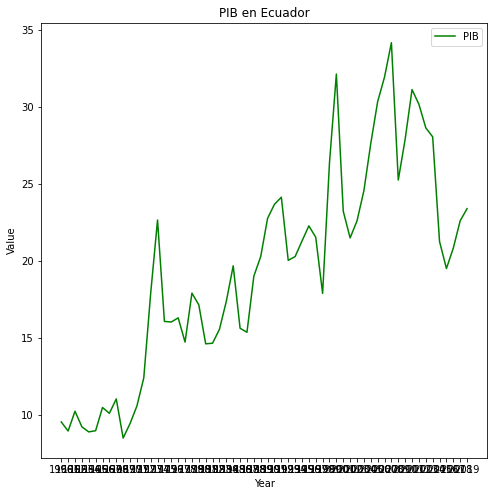

In [21]:
#Grafica 1
index = df.index.values.tolist()
EC = df['Ecuador'].fillna(method='backfill').values
data = pd.DataFrame({'Ecuador' : EC})
df['Year']=df.index
fig = plt.figure(figsize=(8,8))
plt.title('PIB en Ecuador')
plt.plot(df['Year'],df['Ecuador'], label='PIB', color='green',)
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

In [22]:
#Variables
X=df['Year'].values.reshape(-1,1)
y=df['Ecuador']

In [23]:
#Split en train y test.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [24]:
#Entrenamiento 
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
date_predicted = linear_regressor.predict(X_test)

In [25]:
#Model score
print('Precisión: ', linear_regressor.score(X_train, y_train))

Precisión:  0.699017421534448


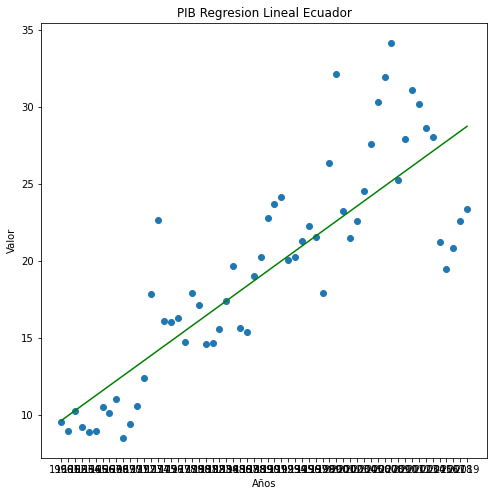

In [26]:
fig = plt.figure(figsize=(8,8))
years=np.arange(1960, 2020, dtype=int)
prediction= linear_regressor.predict(years.reshape(-1,1))
plt.scatter(X.flatten(),y)
plt.plot(X.flatten(),prediction,color='green')
plt.xlabel('Años')  
plt.ylabel('Valor') 
plt.title('PIB Regresion Lineal Ecuador')
plt.show()

In [36]:
#PRUEBA 1
#Prediccion del PIB con año a futuro
today=df.loc['2019']['Ecuador']
predict=linear_regressor.predict([[2020]])
print("El valor del PIB en el 2019:",today,", vs la predicción del 2020 es de:", predict)

El valor del PIB en el 2019: 23.39003998 , vs la predicción del 2020 es de: [29.05854896]


In [35]:
#PRUEBA 2
#Prediccion del PIB con año a futuro
today=df.loc['2019']['Ecuador']
predict=linear_regressor.predict([[2021]])
print("El valor del PIB en el 2019:",today,", vs la predicción del 2020 es de:", predict)

El valor del PIB en el 2019: 23.39003998 , vs la predicción del 2020 es de: [29.382267]


In [34]:
#PRUEBA 3
#Prediccion del PIB con año a futuro
today=df.loc['2019']['Ecuador']
predict=linear_regressor.predict([[2030]])
print("El valor del PIB en el 2019:",today,", vs la predicción del 2020 es de:", predict)

El valor del PIB en el 2019: 23.39003998 , vs la predicción del 2020 es de: [32.29572935]
